# Описание проекта Сборного проекта 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откроем файл с данными и изучим общую информацию

- Импортируем библиотеки
- Изучим общую информацию
- Посмотрим на оформление

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**ВЫВОД**

Из таблицы датасета мы видим данные, состоящие из 11 столбцов и 16715 строк!

- Необходимо изменить на нижний регистр названия столбцов;
- Изменить тип данных в столбце User_Score на float, Year_of_Release на int;
- Есть пропуски в столбце Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

## Шаг 2. Подготовим данные

- Заменим названия столбцов (приведём к нижнему регистру);


- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;


- Обработаем пропуски при необходимости:
  - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
  
  - Опишем причины, которые могли привести к пропускам;
  
  - Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;
  
  
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Меняем регистр в названии колонок на нижний и проверяем результат

In [7]:
games.columns=games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типа данных

Посмотрим столбец user_score - его формат 'object, что очень странно, ведь если бы там были только числа и NaN'ы, то формат был бы 'float':

In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим "tbd". tbd это to be defined (предстоит определить). Посмотрим, сколько их там таких:

In [9]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


2424 строк с данным значением. Его нужно заменить на пропуски вот так:

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')

Изменим тип данных в столбце year_of_release, т.к. все года целочисленны.

In [11]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Проверим изменения

In [12]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Посчитаем количество продаж во всех регионах и запишите в отдельный столбец

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проверим

In [15]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**ВЫВОД**

Изменил тип данных в столбцах user_score и year_of_release, для дальнейшего анализа нужен числовой тип данных. Пропуски заполнять не стал, так как это бы дало не верный анализ, здесь нет каких либо совпадений или закономерностей, поэтому решил оставить пропуски как есть. Значения tbd - это пропуски, я их убрал преобразовав столбец в тип float, для анализа они не понадобятся.

Добавил столбец total_sales и посчитал количество продаж во всех регионах.

## Шаг 3. Проведём исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы.
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим, сколько игр выпускалось в разные годы.

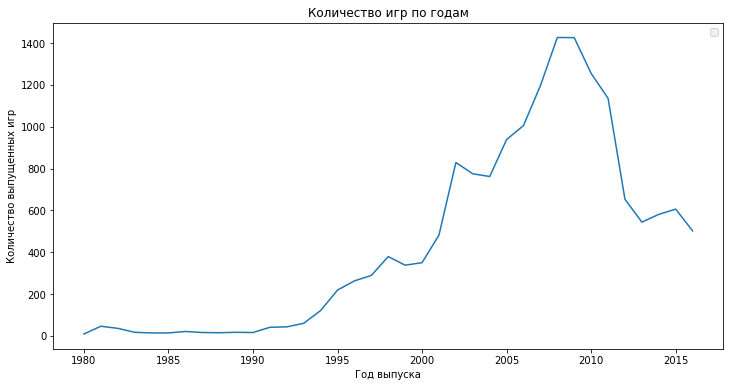

In [16]:
games_by_each_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

In [17]:
games.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов и достигают максимум в 2008 году. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.

### Посмотрим, как менялись продажи по платформам.

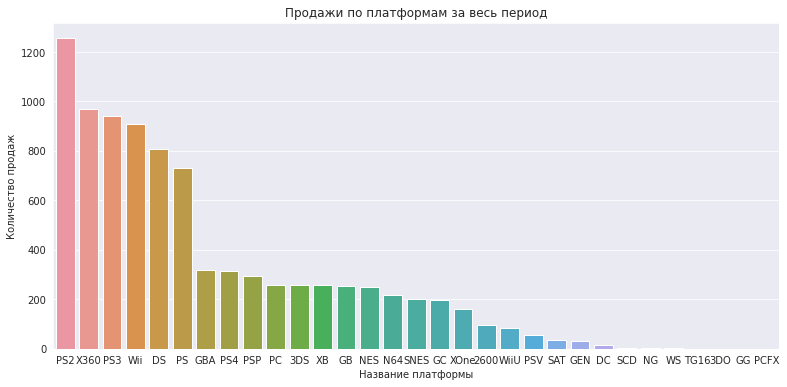

In [18]:
platform_on_sales = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года

In [19]:
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2005)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.

In [20]:
top_5_platforms = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

Выведем топ 5 продаваемых платформ

In [21]:
top_5_platforms

,platform,total_sales
0,PS2,"1,255.77"
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Отрисуем все игровые платформы и их поведение за последние 10 лет

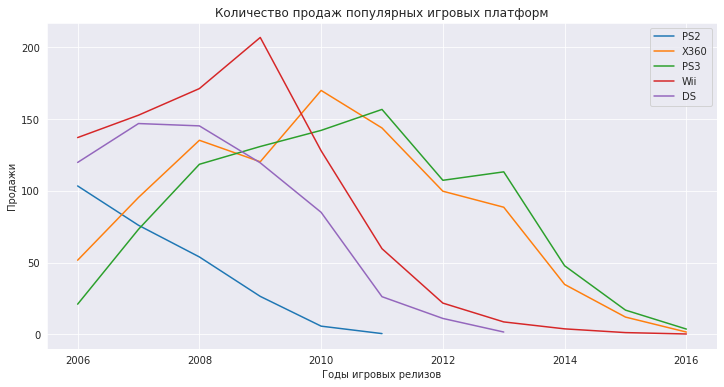

In [22]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,games)['total_sales'], label=i)
    plt.legend()

- Практически все игровые платформы в среднем существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station 3 и XBOX 360 
- Самый пик наступает примерно через 5 лет после выхода приставки
- у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Определим период, за который нужно взять данные для дальнейшего исследования.

In [23]:
decline_period_data = games[games['year_of_release'] > 2009]
decline_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.00,6.30,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [24]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Сохраним в переменной games_top_5_platforms топ 5 платформ и избавимся от выбросов

In [25]:
list_of_top5 = ['PS4','XOne','PC','WiiU','3DS',]
games_top_5_platforms = decline_period_data[decline_period_data['platform'].isin(['PS4','XOne','PC','WiiU','3DS'])]
games_top_5_platforms = games_top_5_platforms[games_top_5_platforms['total_sales']<1.4]

In [26]:
games_top_5_platforms['total_sales'].describe()

count   1,614.00
mean        0.23
std         0.29
min         0.01
25%         0.04
50%         0.11
75%         0.31
max         1.39
Name: total_sales, dtype: float64

In [27]:
games_top_5_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,477.00,0.21,0.27,0.01,0.04,0.11,0.26,1.39
PC,461.00,0.17,0.24,0.01,0.03,0.07,0.20,1.36
PS4,326.00,0.26,0.30,0.01,0.05,0.12,0.36,1.32
WiiU,135.00,0.29,0.30,0.01,0.07,0.19,0.42,1.30
XOne,215.00,0.32,0.36,0.01,0.05,0.16,0.45,1.39


Отрисуем ящики с усами 

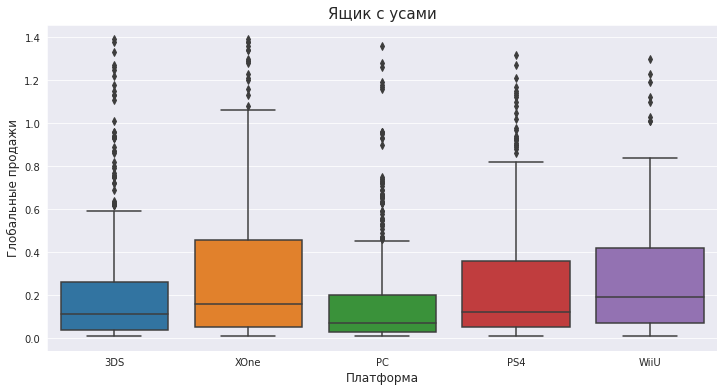

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=games_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

- Провели срез данных для того, чтоыб отрисовать ящики с усами. 
- Исходя из графиков видно, что медиана протекает у всех по разному
- Больше всех продаж у 3DS, затем PC, после PS4, WII и XOne на последнем месте.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [29]:
sony_play_station4 = games[games['platform']=='PS4']
print('Корреляция между оценками пользователей и продажами', 
      sony_play_station4['user_score'].corr(sony_play_station4['total_sales'])
)

Корреляция между оценками пользователей и продажами -0.031957110204556424


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

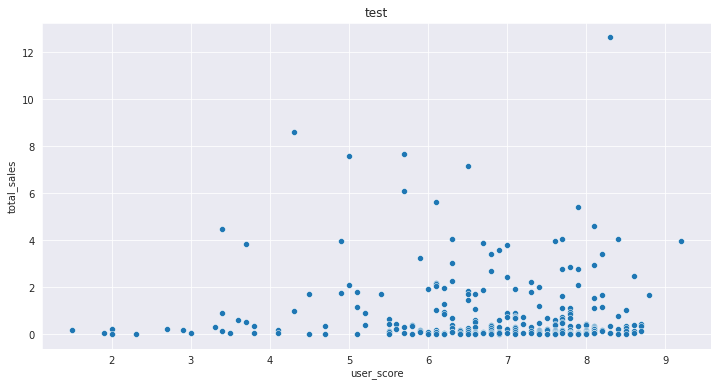

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('test')
plt.show()

Построим диаграмму рассеяния по оценкам критиков

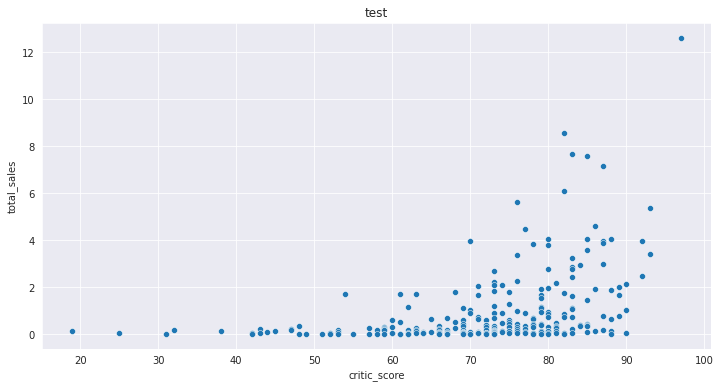

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('test')
plt.show()

Корреляция между оценкой критиков и продажам

In [32]:
print('Корреляция между оценкой критиков и продажам', 
      sony_play_station4['critic_score'].corr(sony_play_station4['total_sales'])
)

Корреляция между оценкой критиков и продажам 0.40656790206178095


Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции

In [33]:
def other_platform_matrix(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

С помощью цикла выведем все 5 графиков

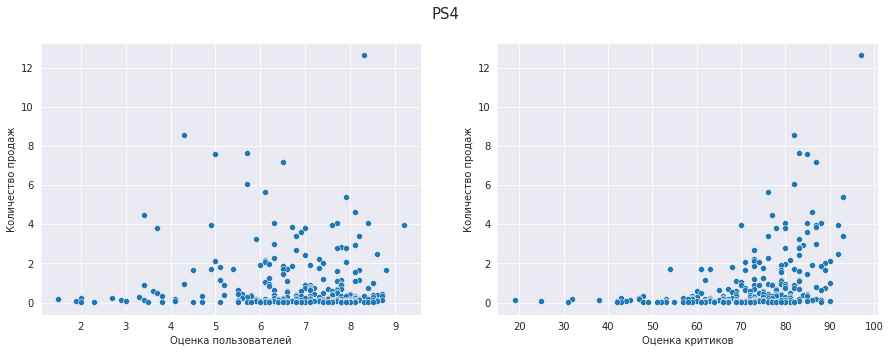

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40656790206178095




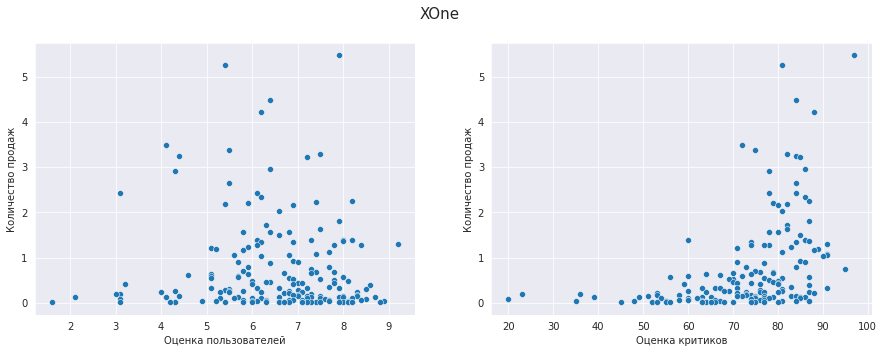

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084017




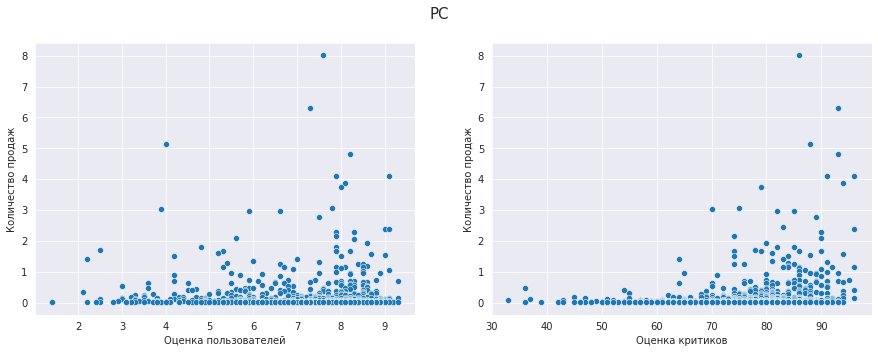

Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.2568867378948215




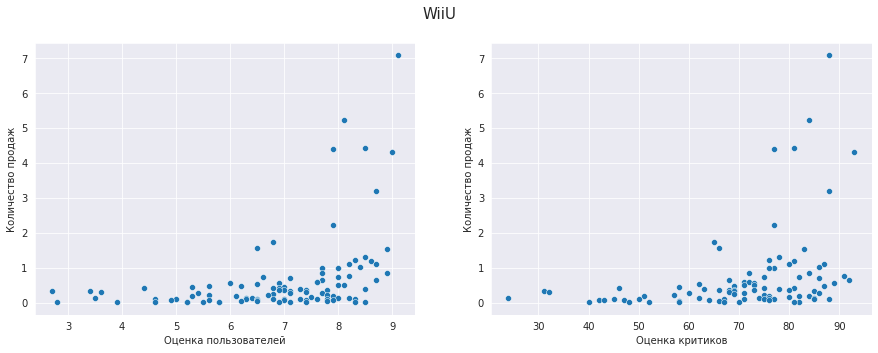

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.34837976012017485
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.4002190202148617




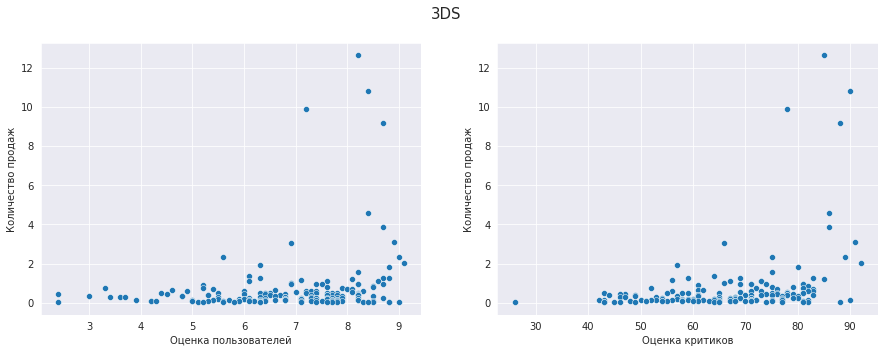

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.3494009303924131
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571082




In [34]:
for platform in list_of_top5:
    other_platform_matrix(platform)

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей

In [35]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(games[games['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(games[games['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  games[games['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  games[games['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия PS4 : 2.121796544989326
Стандартное отклонение PS4 : 1.4566387832916319
Среднее PS4 : 6.748249027237354
Медиана PS4 : 7.0


Дисперсия XONE : 1.8965188383045526
Стандартное отклонение XONE : 1.377141546212499
Среднее XONE : 6.521428571428572
Медиана XONE : 6.8


Дисперсия PC : 2.3377471580367684
Стандартное отклонение PC : 1.5289693123266956
Среднее PC : 7.062467532467533
Медиана PC : 7.5


Дисперсия WIIU : 2.039784
Стандартное отклонение WIIU : 1.4282100685823498
Среднее WIIU : 6.904
Медиана WIIU : 7.1


Дисперсия 3DS : 2.0189433875016514
Стандартное отклонение 3DS : 1.4208952767539385
Среднее 3DS : 6.831609195402299
Медиана 3DS : 7.1




Посчитаем дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков

In [36]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(games[games['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(games[games['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  games[games['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  games[games['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия PS4 : 155.28135235575712
Стандартное отклонение PS4 : 12.46119385756265
Среднее PS4 : 72.09126984126983
Медиана PS4 : 73.0


Дисперсия XONE : 166.7994117853016
Стандартное отклонение XONE : 12.915084660400085
Среднее XONE : 73.32544378698225
Медиана XONE : 76.0


Дисперсия PC : 124.61169543742969
Стандартное отклонение PC : 11.162960872341607
Среднее PC : 75.92867132867133
Медиана PC : 78.0


Дисперсия WIIU : 213.39555555555555
Стандартное отклонение WIIU : 14.608064743680305
Среднее WIIU : 70.73333333333333
Медиана WIIU : 73.5


Дисперсия 3DS : 153.49571286848072
Стандартное отклонение 3DS : 12.38933867760829
Среднее 3DS : 67.10119047619048
Медиана 3DS : 68.0




- У PS4, Xbox One, WiiU, 3DS наблюдается не сильная связь между оценками критиков и продажами. 
- Cвязь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. 
- У WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. 

Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей.

### Посмотрим на общее распределение игр по жанрам. 

Методом сводных таблиц выведем жанры и их продажи.  Отсортируем по убыванию.

In [37]:
distr_genre = games_top_5_platforms.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,124.13
1,Role-Playing,52.48
2,Shooter,42.67
3,Sports,39.10
4,Misc,23.23
5,Simulation,17.22
6,Platform,15.39
7,Adventure,14.38
8,Racing,14.04
9,Fighting,12.86


Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу

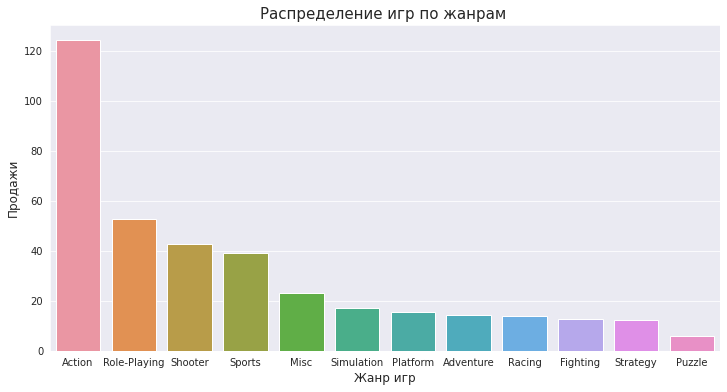

In [38]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанр игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

- Лучше всего продаются жанры Экшн. Стратегии как ни странно держутся на последнем месте.

**ВЫВОД**

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation и Xbox 360
- Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.
- У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей

## Шаг 4. Составим портрет пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишем функции для создания сводных таблиц и отсривоки барплотов

In [39]:
# Функция для создания сводбных таблиц за весь период

def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = games_top_5_platforms.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год

def for_pivot_2016(row, title):
    temp = games[games['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(
            by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

### Портрет пользователя North America:

  platform  na_sales
0     XOne     39.44
1      3DS     32.58
2      PS4     28.39
3       PC     21.03
4     WiiU     18.84



          genre  na_sales
0        Action     48.56
1       Shooter     18.39
2  Role-Playing     18.07
3        Sports     15.82
4          Misc      9.37



  rating  na_sales
0      M     36.96
1   E10+     30.41
2      E     24.54
3      T     22.94
4     EC      0.09





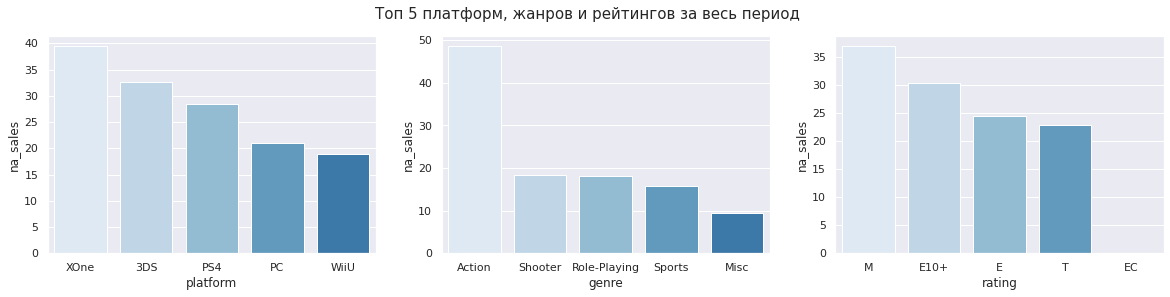

In [40]:
# Выведем топ 5 платформ, жанров и рейтингов за весь период

forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      PS4     21.49
1     XOne     14.27
2      3DS      4.14
3     WiiU      2.10
4       PC      1.36



          genre  na_sales
0       Shooter     16.24
1        Action      9.29
2        Sports      7.54
3  Role-Playing      5.89
4      Fighting      1.84



  rating  na_sales
0      M     15.67
1      T      8.95
2      E      7.97
3   E10+      3.81





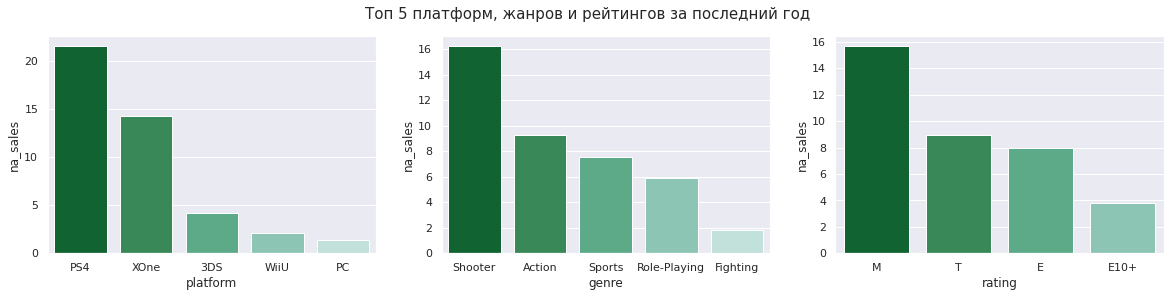

In [41]:
# Выведем топ 5 платформ, жанров и рейтингов за последний год

for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

- Самые популярные игровые платформы в северной америке за все время это: XOne, 3DS, PS4, PC, WiiU
- Топ 5 жанров в северной америке за все время: action, shooter, role-playing, sports, misc
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"


- Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3
- Топ жанров игр: Shooter, Action, Sports
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"

### Портрет пользователя European Union:

  platform  eu_sales
0       PC     49.19
1      PS4     34.67
2      3DS     22.66
3     XOne     22.33
4     WiiU     13.36



          genre  eu_sales
0        Action     44.92
1       Shooter     19.27
2        Sports     15.67
3  Role-Playing     14.85
4    Simulation      9.39



  rating  eu_sales
0      M     39.26
1      E     24.38
2   E10+     24.29
3      T     23.94
4     RP      0.03





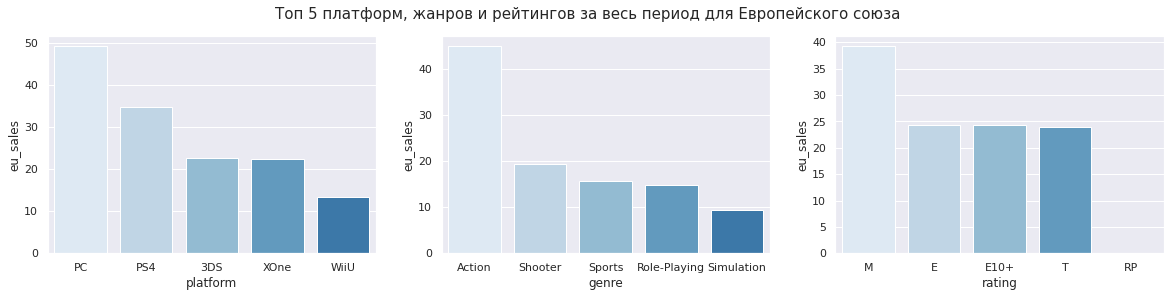

In [42]:
# Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза

forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      PS4     31.78
1     XOne      9.63
2       PC      3.53
3      3DS      2.33
4     WiiU      1.48



          genre  eu_sales
0       Shooter     15.90
1        Sports     12.01
2        Action     10.68
3  Role-Playing      4.28
4        Racing      1.77



  rating  eu_sales
0      M     16.54
1      E     13.61
2      T      9.79
3   E10+      3.81





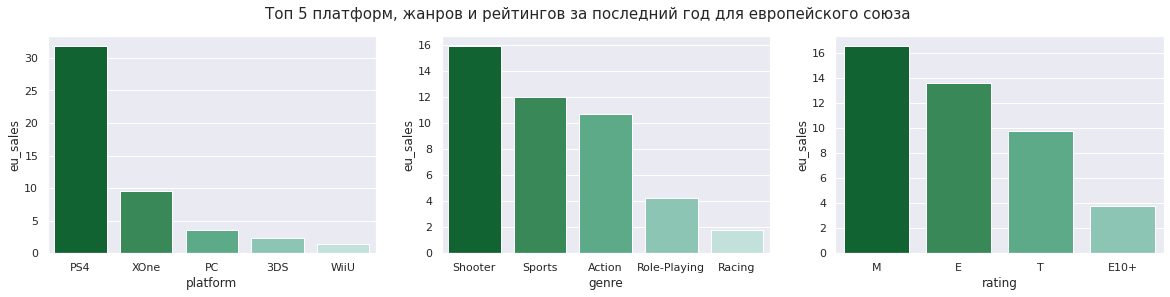

In [43]:
# Выведем топ 5 платформ, жанров и рейтингов за последний год для европейского союза

for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

- Самые популярные игровые платформы в Европе это: PC, PS4, 3DS, XOne, WiiU
- Топ 5 жанров в Европе : action, shooter, sports,  role-playing, simulation
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"


- За последний год интерес у пользователя кардинально изменился:
- Топ жанров стал: shooter, sports, action
- Топ платформ: PS4, Xone, PC
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

### Портрет пользователя Japanese:

  platform  jp_sales
0      3DS     42.32
1      PS4      8.98
2     WiiU      4.50
3     XOne      0.12
4       PC      0.00



          genre  jp_sales
0        Action     19.16
1  Role-Playing     15.56
2          Misc      6.16
3     Adventure      3.19
4        Sports      3.12



  rating  jp_sales
0      E      6.65
1      T      6.52
2   E10+      4.75
3      M      2.81
4     EC      0.00





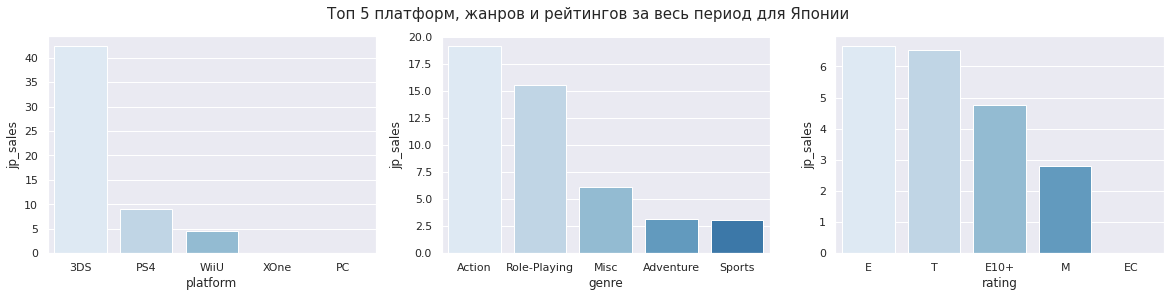

In [44]:
# Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии

forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3DS      8.03
1      PS4      5.74
2      PSV      3.56
3      PS3      1.30
4     WiiU      0.67



          genre  jp_sales
0        Action      7.07
1  Role-Playing      6.61
2     Adventure      1.18
3       Shooter      1.06
4          Misc      1.04



  rating  jp_sales
0      T      2.27
1      M      1.20
2      E      1.07
3   E10+      0.45





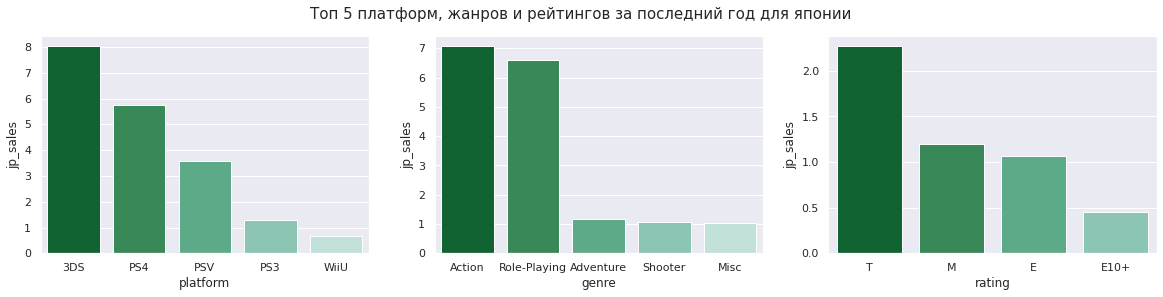

In [45]:
# Выведем топ 5 платформ, жанров и рейтингов за последний год для японии

for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

- Самые популярные игровые платформы в Японии это: 3DS, PS4, WiiU, XOne,  PC
- Топ 5 жанров в Японии : action, Role-Playing, misc, adventure, sports
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"


- За последний год интерес у пользователя кардинально изменился
- Топ Жанров: action, role-playing, adventure
- топ платформ: 3ds, ps4, psv
- топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех

**ВЫВОД**

Самые популярные игровые платформы в северной америке это: XOne, 3DS, PS4, PC, WiiU Топ 5 жанров в северной америке : action, shooter, role-playing, sports, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Самые популярные игровые платформы в Европе это: PC, PS4, 3DS, XOne, WiiU Топ 5 жанров в Европе : aaction, shooter, sports,  role-playing, simulation. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

Самые популярные игровые платформы в Японии это: 3DS, PS4, WiiU, XOne,  PC Топ 5 жанров в Японии : action, Role-Playing, misc, adventure, sports. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

Если брать данные за последний год:

То в Северной Америке:

- топ игровых платформ выглядит так: PS4, Xone, DS3
- Топ Жанров игр: Shooter, Action, Sports
- Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"


В Европейском союзе:

- Топ игровых платформ : PS4, Xone, PC
- Топ жанров: Shooter, Sports, Action
- Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"


В Японии:

- Топ игровых платформ : 3DS, PS4, PSV
- Топ жанров: Action, Role-playing, Adventure
- Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"


Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше

## Шаг 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и 
Sports (англ. «спортивные соревнования») разные.
- Пороговое значение alpha зададим самостоятельно.
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)

In [46]:
xone_hyp = games[(games['platform']=='XOne') & (games['year_of_release']>2006)]['user_score']

pc_hyp = games[(games['platform']=='PC') & (games['year_of_release']>2006)]['user_score']

Посчитаем средний рейтинг пользователя для xbox платформ

In [47]:
xone_hyp.mean()

6.521428571428572

Посчитаем средний рейтинг пользователя для PC платформ

In [48]:
pc_hyp.mean()

6.765499124343257

Выполним проверку гипотезы. Будем использовать метод ttest_ind

In [49]:
alpha = 0.05

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.04401892858926169
Отвергаем нулевую гипотезу


**Вывод:** Значение p-value равно чуть больше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 4% можно получить различность рейтингов двух платформ

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками

In [50]:
genre_action_hyp = games[(games['genre']=='Action') & (games['year_of_release']>2006)]['user_score']

genre_sports_hyp = games[(games['genre']=='Sports') & (games['year_of_release']>2006)]['user_score']

Выведем среднюю оценку по жанру Action

In [51]:
genre_action_hyp.mean()

6.836079077429983

Выведем среднюю оценку по жанру Sports

In [52]:
genre_sports_hyp.mean()

6.307979626485569

Выполним проверку гипотезы. Будем использовать метод ttest_ind

In [53]:
alpha = 0.05

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


**Вывод:** Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

**ВЫВОД**

Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

## Общий вывод

- Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы.
- Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа
- Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
- За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
- Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли
- Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус
- Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
- Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии

**После мы составили портреты пользователей каждого региона.**
- Выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
- В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
- В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4.

Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.